In [1]:
""" This module implements the base function to implement a VQE for a Ising Chain with Transverse Field. """
from pennylane import numpy as np

import sys
sys.path.insert(0, '../')
import vqe as vqe
import annni_model as annni
import qcnn as qcnn
import visualization as qplt
import losses

In [2]:
path = '../data/vqes/ANNNI/'

In [3]:
N = 8
side = 30


In [4]:
try:
    myvqe = vqe.load_vqe(path+'N'+str(N)+'n'+str(side))
except:
    print('VQE not found')

In [5]:
myqcnn = qcnn.qcnn(myvqe, qcnn.qcnn_circuit, n_outputs = 2)

In [6]:
train_index = np.arange(0,2*side-1)

In [7]:
myqcnn.train(.15, 3000, train_index, losses.cross_entropy, circuit=True)

+--- CIRCUIT ---+
0: ──||──||──RY(0.00)──RX(8.00)───||──RY(16.00)─────||──RY(20.00)─╭C──RY(25.00)──||
1: ──||──||──RY(1.00)──RX(9.00)───||──RY(16.00)─╭C──||──RY(21.00)─╰X──RY(26.00)──||
2: ──||──||──RY(2.00)──RX(10.00)──||──RY(17.00)─╰X──||──RY(21.00)─╭C──RY(27.00)──||
3: ──||──||──RY(3.00)──RX(11.00)──||──RY(17.00)─╭C──||──RY(22.00)─╰X──RY(28.00)──||
4: ──||──||──RY(4.00)──RX(12.00)──||──RY(18.00)─╰X──||──RY(22.00)─╭C──RY(29.00)──||
5: ──||──||──RY(5.00)──RX(13.00)──||──RY(18.00)─╭C──||──RY(23.00)─╰X──RY(30.00)──||
6: ──||──||──RY(6.00)──RX(14.00)──||──RY(19.00)─╰X──||──RY(23.00)─╭C──RY(31.00)──||
7: ──||──||──RY(7.00)──RX(15.00)──||──RY(19.00)─────||──RY(24.00)─╰X──RY(32.00)──||

──╭C──────────────────────────╭C──────────────────────────────────────||──||────────────────||
──╰ControlledOperation(33.00)─╰ControlledOperation(34.00)──RX(41.00)──||──||──RY(45.00)─────||
──╭C──────────────────────────╭C──────────────────────────────────────||──||────────────────||
──╰ControlledOperation(3

Cost: 0.07976006716489792: 100%|███████████████████████████████████████████████████████████| 3000/3000 [00:26<00:00, 112.80it/s]


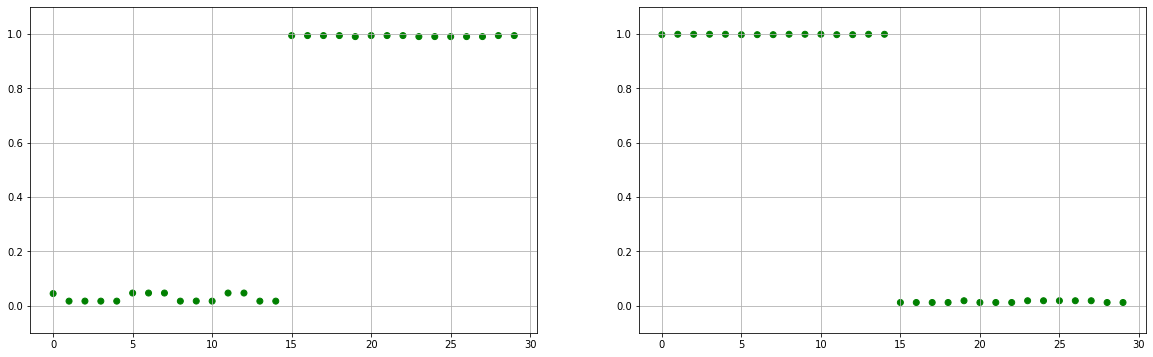

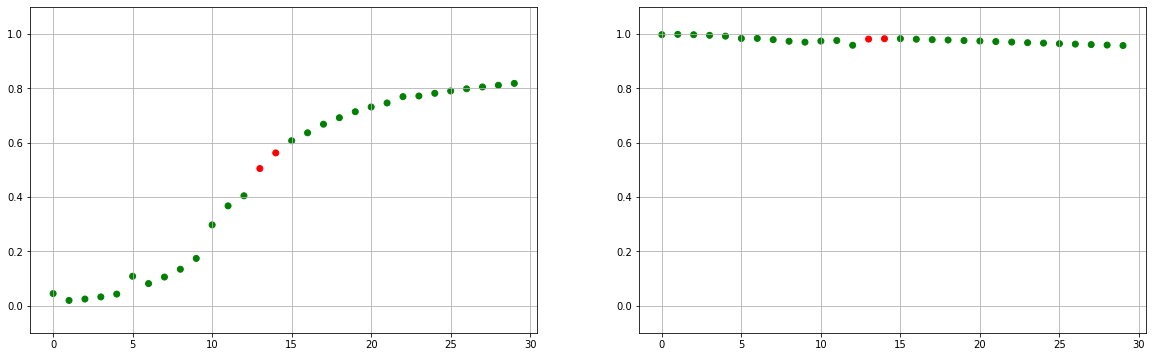

In [8]:
qplt.show_QCNN_classification2D(myqcnn)

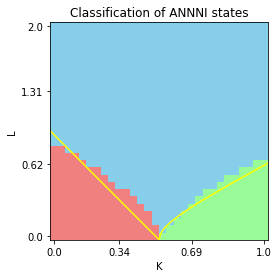

In [9]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = True)

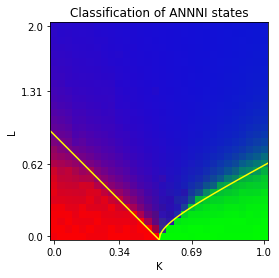

In [10]:
qplt.show_QCNN_classificationANNNI(myqcnn, hard_thr = False)